In [4]:
import os
import pandas as pd
from exp_tools import *
import numpy as np

In [5]:
# 遞迴尋找所有 csv
def find_all_csv_files(root_dir):
    map_csv_files = {}
    for dirpath, _, filenames in os.walk(root_dir):
        for f in filenames:
            if f.endswith('.csv'):
                map_csv_files[os.path.splitext(f)[0]] = os.path.join(dirpath, f)
    return map_csv_files

root_dir = 'instance'
instance_files = find_all_csv_files(root_dir)
print(instance_files)
print(len(instance_files))

{'baseline_ai4i2020': 'instance/baseline_ai4i2020.csv', 'PMDI_imputed_rolling_mean': 'instance/imputed_data/rolling/PMDI_imputed_rolling_mean.csv', 'PMDI_imputed_rolling_regression': 'instance/imputed_data/rolling/PMDI_imputed_rolling_regression.csv', 'PMDI_imputed_rolling_knn': 'instance/imputed_data/rolling/PMDI_imputed_rolling_knn.csv', 'PMDI_imputed_rolling_median': 'instance/imputed_data/rolling/PMDI_imputed_rolling_median.csv', 'PMDI_imputed_linear_knn': 'instance/imputed_data/linear/PMDI_imputed_linear_knn.csv', 'PMDI_imputed_linear_median': 'instance/imputed_data/linear/PMDI_imputed_linear_median.csv', 'PMDI_imputed_linear_mean': 'instance/imputed_data/linear/PMDI_imputed_linear_mean.csv', 'PMDI_imputed_linear_regression': 'instance/imputed_data/linear/PMDI_imputed_linear_regression.csv', 'PMDI_imputed_all-rolling': 'instance/imputed_data/all-rolling/PMDI_imputed_all-rolling.csv', 'PMDI_imputed_ffill_median': 'instance/imputed_data/ffill/PMDI_imputed_ffill_median.csv', 'PMDI_im

===== 處理 baseline_ai4i2020 =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.14s/it]


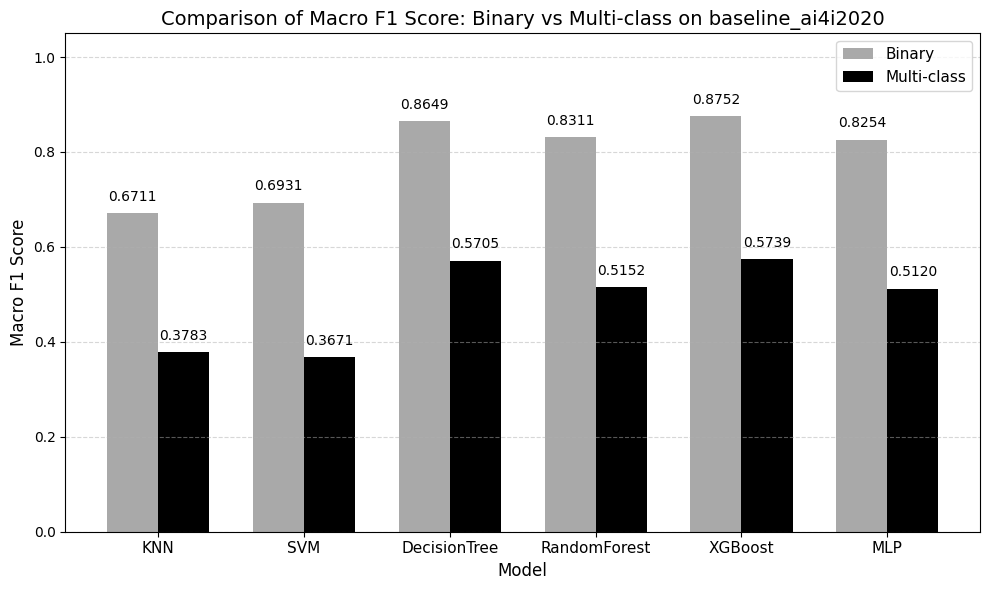

===== 處理 PMDI_imputed_rolling_mean =====


Tuning Models: 100%|██████████| 6/6 [00:16<00:00,  2.81s/it]


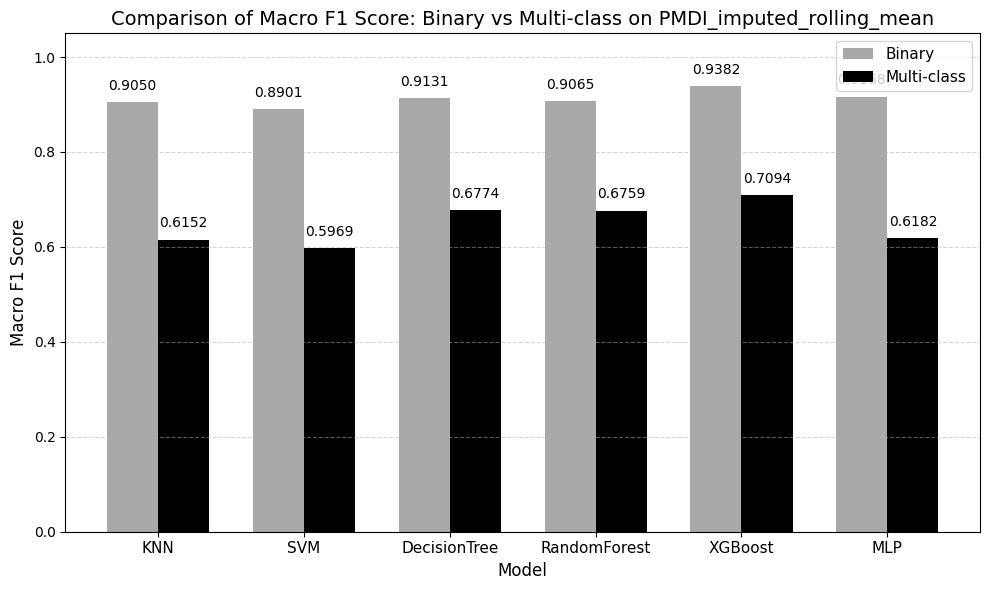

===== 處理 PMDI_imputed_rolling_regression =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.19s/it]


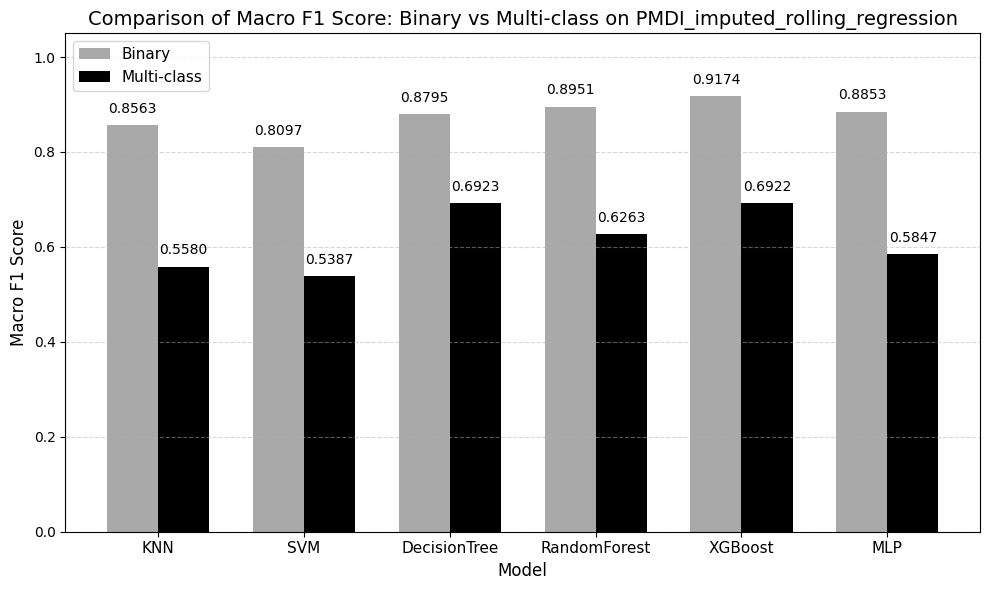

===== 處理 PMDI_imputed_rolling_knn =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.05s/it]


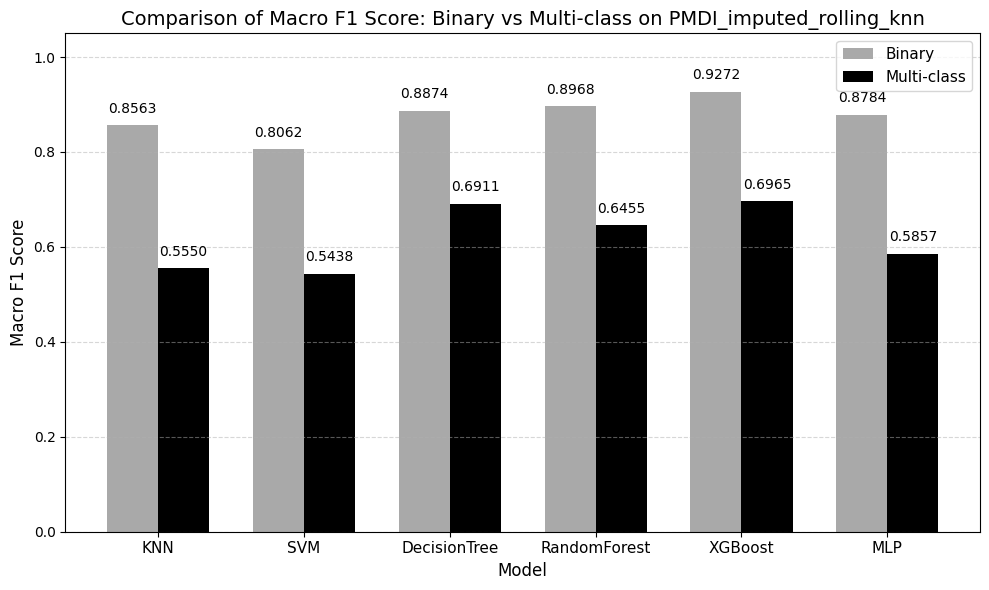

===== 處理 PMDI_imputed_rolling_median =====


Tuning Models: 100%|██████████| 6/6 [00:16<00:00,  2.73s/it]


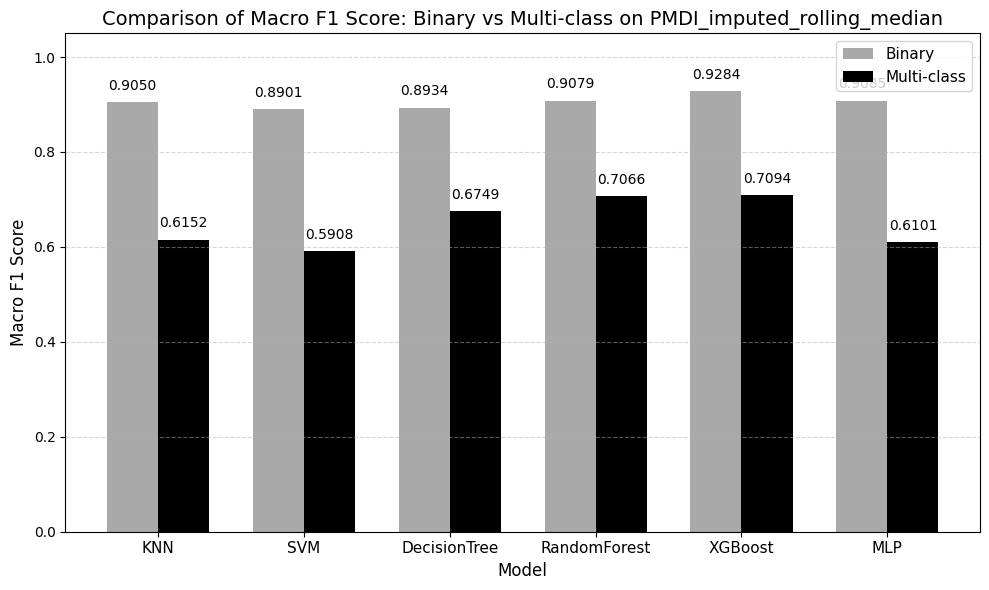

===== 處理 PMDI_imputed_linear_knn =====


Tuning Models: 100%|██████████| 6/6 [00:17<00:00,  2.95s/it]


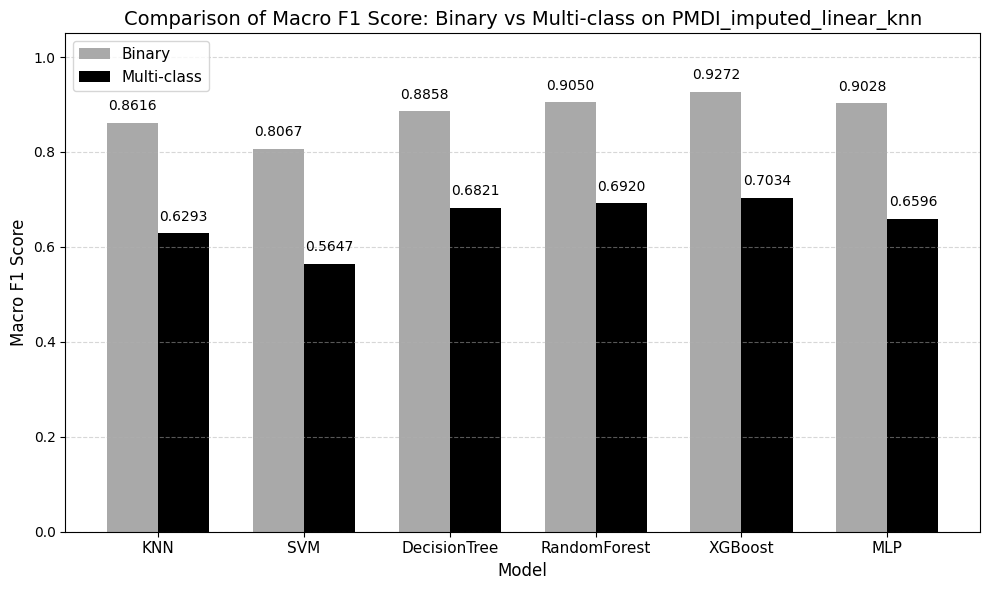

===== 處理 PMDI_imputed_linear_median =====


Tuning Models: 100%|██████████| 6/6 [00:15<00:00,  2.64s/it]


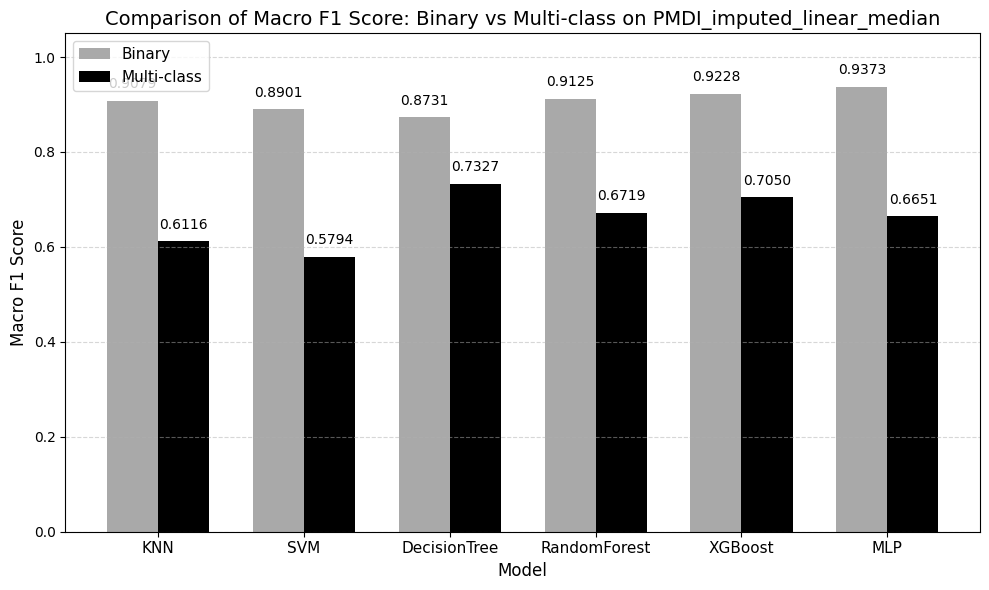

===== 處理 PMDI_imputed_linear_mean =====


Tuning Models: 100%|██████████| 6/6 [00:16<00:00,  2.70s/it]


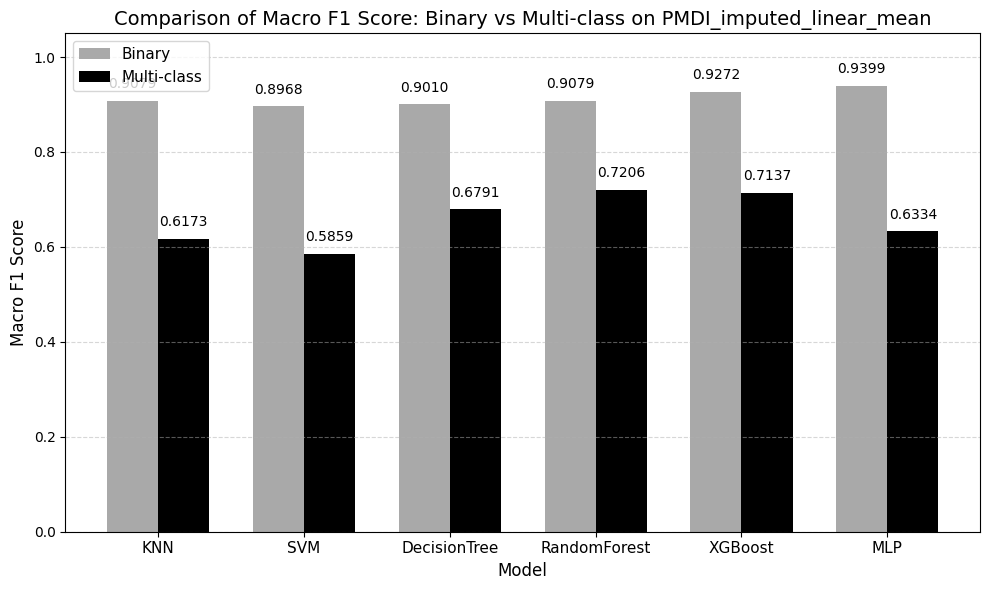

===== 處理 PMDI_imputed_linear_regression =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.13s/it]


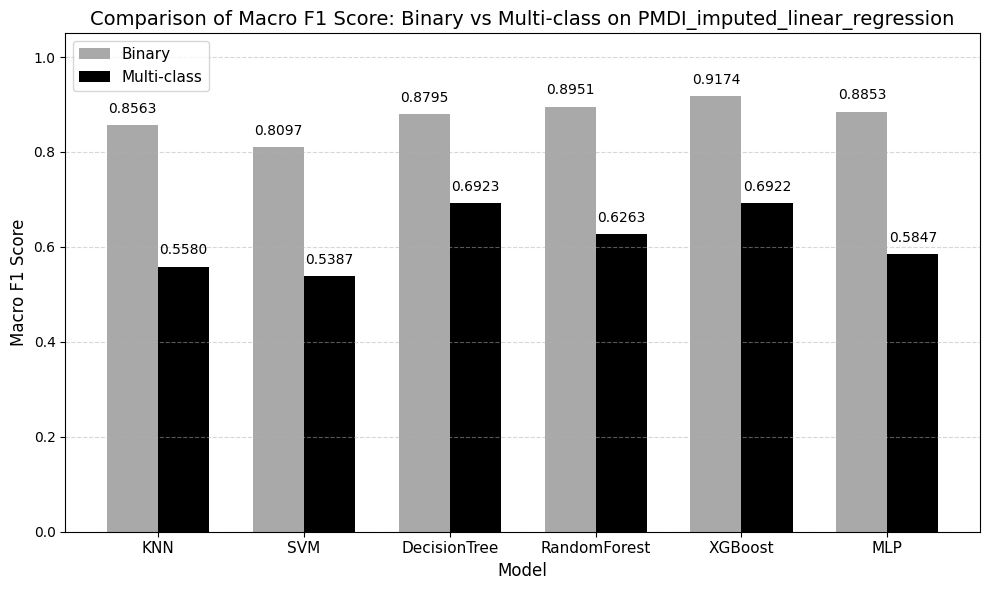

===== 處理 PMDI_imputed_all-rolling =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.24s/it]


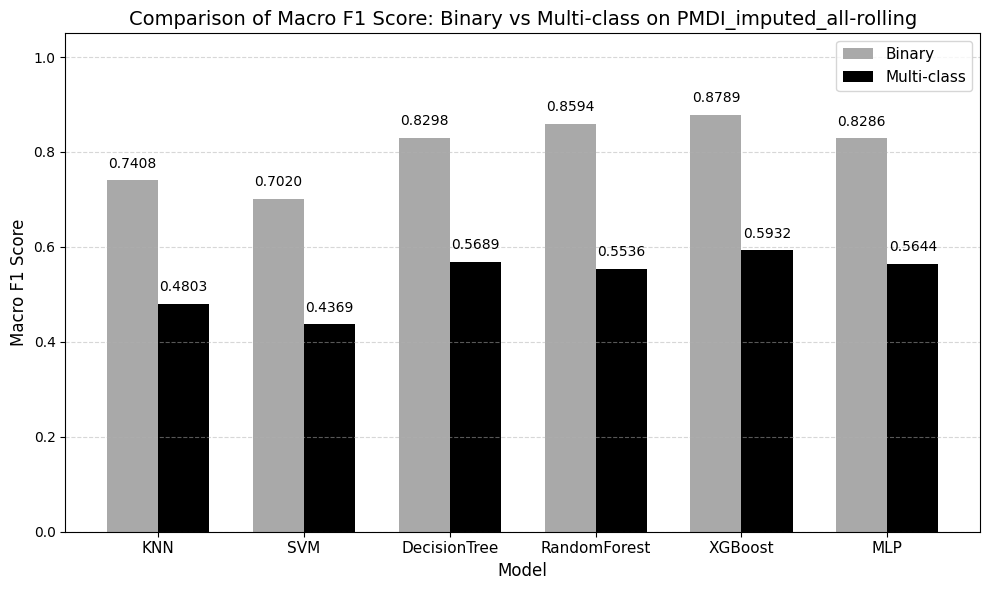

===== 處理 PMDI_imputed_ffill_median =====


Tuning Models: 100%|██████████| 6/6 [00:16<00:00,  2.80s/it]


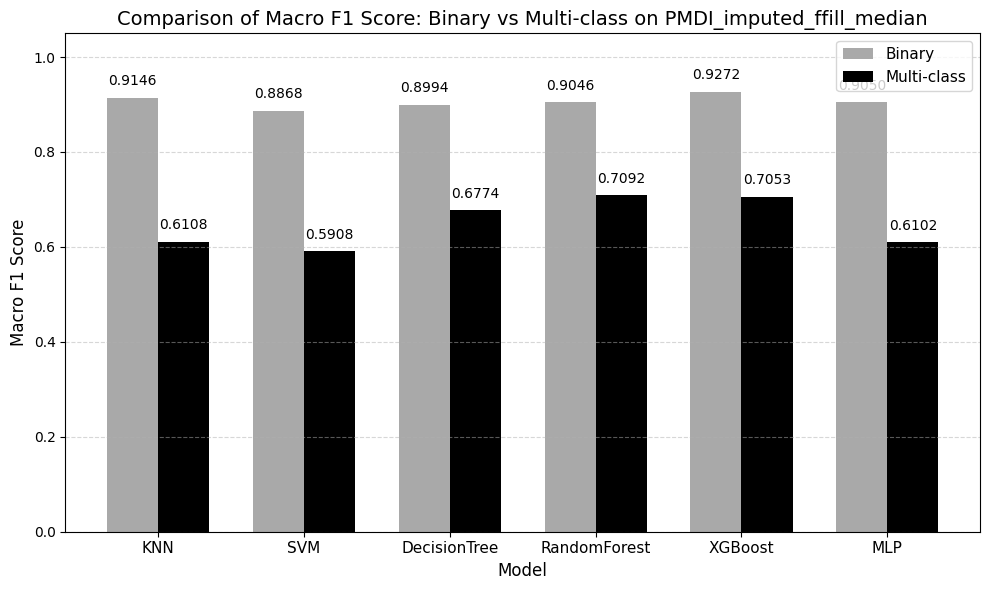

===== 處理 PMDI_imputed_ffill_regression =====


Tuning Models: 100%|██████████| 6/6 [00:19<00:00,  3.17s/it]


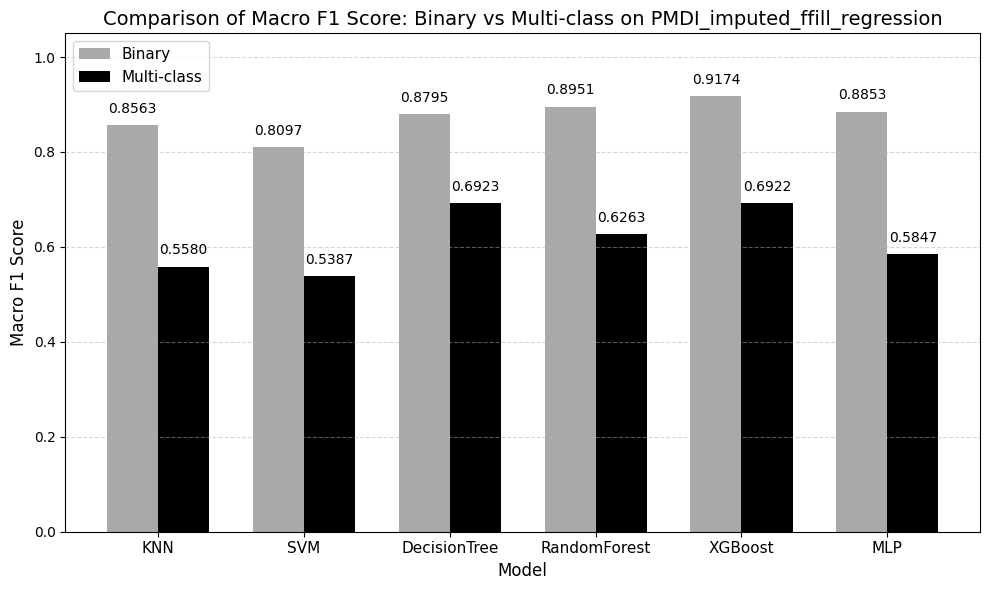

===== 處理 PMDI_imputed_ffill_knn =====


Tuning Models: 100%|██████████| 6/6 [00:20<00:00,  3.43s/it]


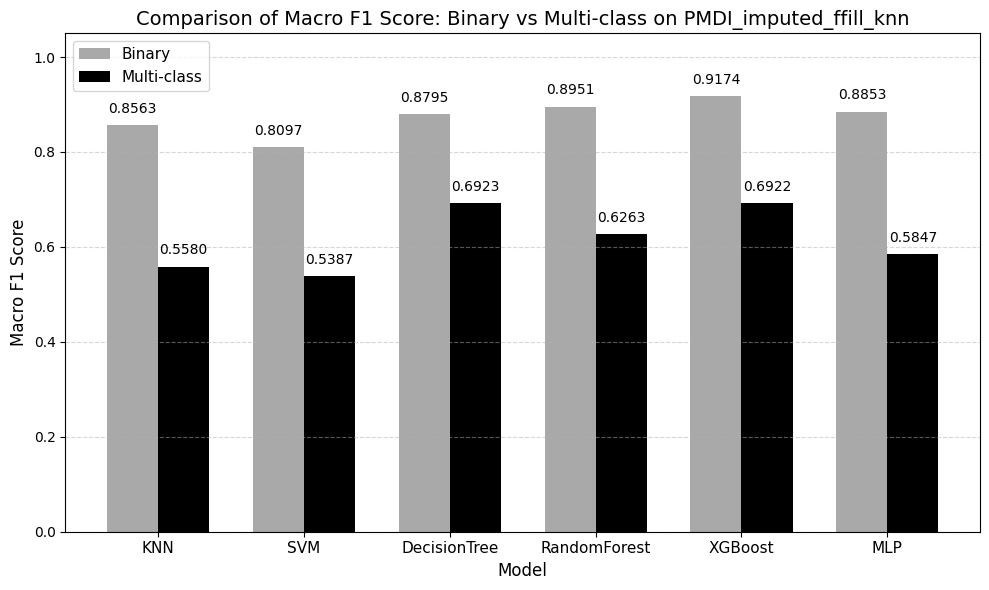

===== 處理 PMDI_imputed_ffill_mean =====


Tuning Models: 100%|██████████| 6/6 [00:18<00:00,  3.15s/it]


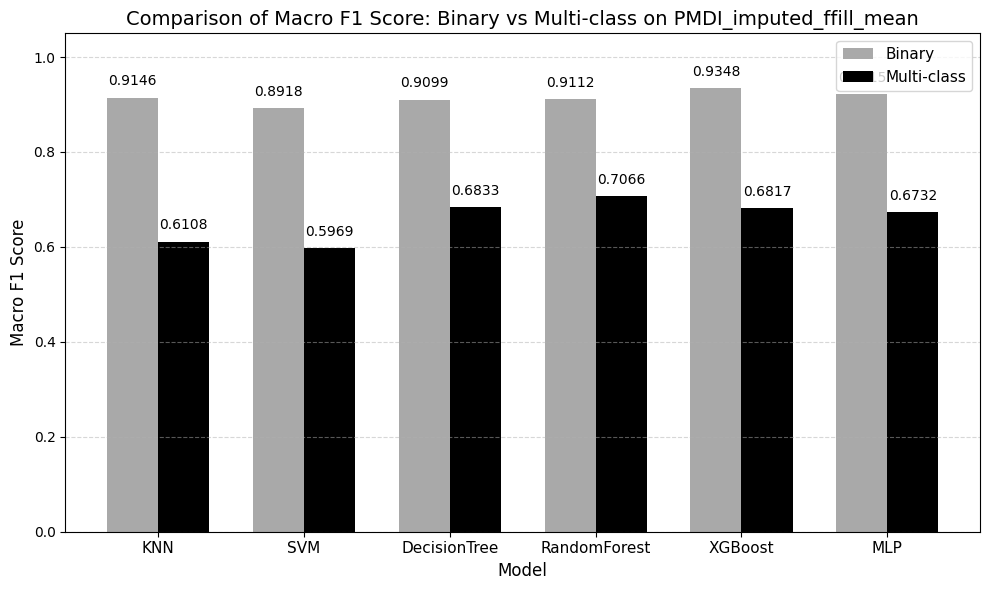

In [6]:
all_results_bin = {}
all_results_multi = {}
np.seterr(all='ignore')

for fname in instance_files:
    print(f'===== 處理 {fname} =====')
    df = load_instance(instance_files[fname])
    df_processed = preprocess(df)
    (X_train_bin, X_test_bin, y_train_bin, y_test_bin,
     X_train_multi, X_test_multi, y_train_multi, y_test_multi) = split_train_test(df_processed)
    with suppress_warnings():
        # Binary
        results_bin = evaluate(X_train_bin, X_test_bin, y_train_bin, y_test_bin, task='binary')
        # Multi-class
        results_multi = evaluate(X_train_multi, X_test_multi, y_train_multi, y_test_multi, task='multiclass')
    all_results_bin[fname] = results_bin['F1']
    all_results_multi[fname] = results_multi['F1']
    # 可選：每個 instance 畫一次 F1 比較圖
    plot_f1_comparison(results_bin, results_multi, fname)

In [7]:
# 彙總所有 instance 的 F1 分數
summary_bin = pd.DataFrame(all_results_bin)
summary_multi = pd.DataFrame(all_results_multi)

print('===== 各 instance 的 Binary F1 分數 =====')
display(summary_bin)
print('===== 各 instance 的 Multi-class F1 分數 =====')
display(summary_multi)

===== 各 instance 的 Binary F1 分數 =====


,baseline_ai4i2020,PMDI_imputed_rolling_mean,PMDI_imputed_rolling_regression,PMDI_imputed_rolling_knn,PMDI_imputed_rolling_median,PMDI_imputed_linear_knn,PMDI_imputed_linear_median,PMDI_imputed_linear_mean,PMDI_imputed_linear_regression,PMDI_imputed_all-rolling,PMDI_imputed_ffill_median,PMDI_imputed_ffill_regression,PMDI_imputed_ffill_knn,PMDI_imputed_ffill_mean
KNN,0.671137,0.905032,0.856272,0.856272,0.905032,0.861598,0.907882,0.907882,0.856272,0.740815,0.914612,0.856272,0.856272,0.914612
SVM,0.693095,0.89009,0.809676,0.806185,0.89009,0.806658,0.89009,0.896774,0.809676,0.702012,0.886762,0.809676,0.809676,0.891807
DecisionTree,0.864904,0.913081,0.87945,0.88742,0.893436,0.885824,0.873085,0.901047,0.87945,0.829756,0.899381,0.87945,0.87945,0.909936
RandomForest,0.83111,0.90648,0.89515,0.896774,0.907882,0.905032,0.912542,0.907882,0.89515,0.859383,0.904592,0.89515,0.89515,0.911222
XGBoost,0.875162,0.938229,0.917442,0.927172,0.928444,0.927172,0.922786,0.927172,0.917442,0.878939,0.927172,0.917442,0.917442,0.934838
MLP,0.825356,0.916775,0.885275,0.878374,0.908452,0.902783,0.937326,0.939923,0.885275,0.828576,0.905032,0.885275,0.885275,0.921548


===== 各 instance 的 Multi-class F1 分數 =====


,baseline_ai4i2020,PMDI_imputed_rolling_mean,PMDI_imputed_rolling_regression,PMDI_imputed_rolling_knn,PMDI_imputed_rolling_median,PMDI_imputed_linear_knn,PMDI_imputed_linear_median,PMDI_imputed_linear_mean,PMDI_imputed_linear_regression,PMDI_imputed_all-rolling,PMDI_imputed_ffill_median,PMDI_imputed_ffill_regression,PMDI_imputed_ffill_knn,PMDI_imputed_ffill_mean
KNN,0.378346,0.615245,0.558029,0.55499,0.615245,0.629308,0.6116,0.617325,0.558029,0.480347,0.610825,0.558029,0.558029,0.610825
SVM,0.367148,0.596906,0.538672,0.543843,0.59077,0.564671,0.579373,0.585929,0.538672,0.436889,0.59077,0.538672,0.538672,0.596906
DecisionTree,0.570534,0.677391,0.692325,0.691092,0.674897,0.682059,0.73269,0.679054,0.692325,0.568933,0.677391,0.692325,0.692325,0.683343
RandomForest,0.515206,0.675928,0.626263,0.645503,0.706622,0.691954,0.671945,0.720564,0.626263,0.553576,0.709159,0.626263,0.626263,0.706622
XGBoost,0.573892,0.709366,0.692155,0.696466,0.709361,0.70339,0.70505,0.713678,0.692155,0.593168,0.705257,0.692155,0.692155,0.68171
MLP,0.511964,0.618207,0.584651,0.585678,0.610126,0.659635,0.665128,0.633374,0.584651,0.564355,0.610169,0.584651,0.584651,0.673151
